In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Steps
        - Look at the big picture
        - Get the data
        - Discover and visualize the data to gain insight
        - Prepare the data for machine learning algorithms
        - Select model and train it
        - Fine tune your model
        - Present your solution
        - Launch, moniter and maintain your system

### Objective:-
    - The models output will be fed to another ML system along with many other signals(information)
    
    - The downstream system will determine whether it is worth investing in a given area or not. 
 
### Problem Type :
    Supervised
    Multiple Regression type, 
    Multivariate Regression

### Performance Measure
    - Root mean square error (RMSE):-preferred for regression. (l2 Norm)
    - Mean Absolute Error(MAE): when outliers are present.(l1 Norm)

### Assumptions Check
    Checking wheather the data will be used as regression or classification task in downstream systems.
    eg. cheap,medium, expensive
    

### Downloading the data
    - Downloading the data via function helps perticularly if the data changes regularly.

In [2]:
import os
import tarfile
import urllib

Download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
Housing_path = os.path.join('datasets', 'housing')
Housing_url = Download_root + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=Housing_url, 
                       housing_path=Housing_path):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

### Loading data using Pandas

In [4]:
def load_data(path = Housing_path):
    csv_path = os.path.join(path, 'housing.csv')
    return pd.read_csv(csv_path)

In [5]:
housing = load_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Histogram

Points to Notics:
    - Scaled Parameters: How data was computed.
    - Required precision in prediction.
    - Sqewness

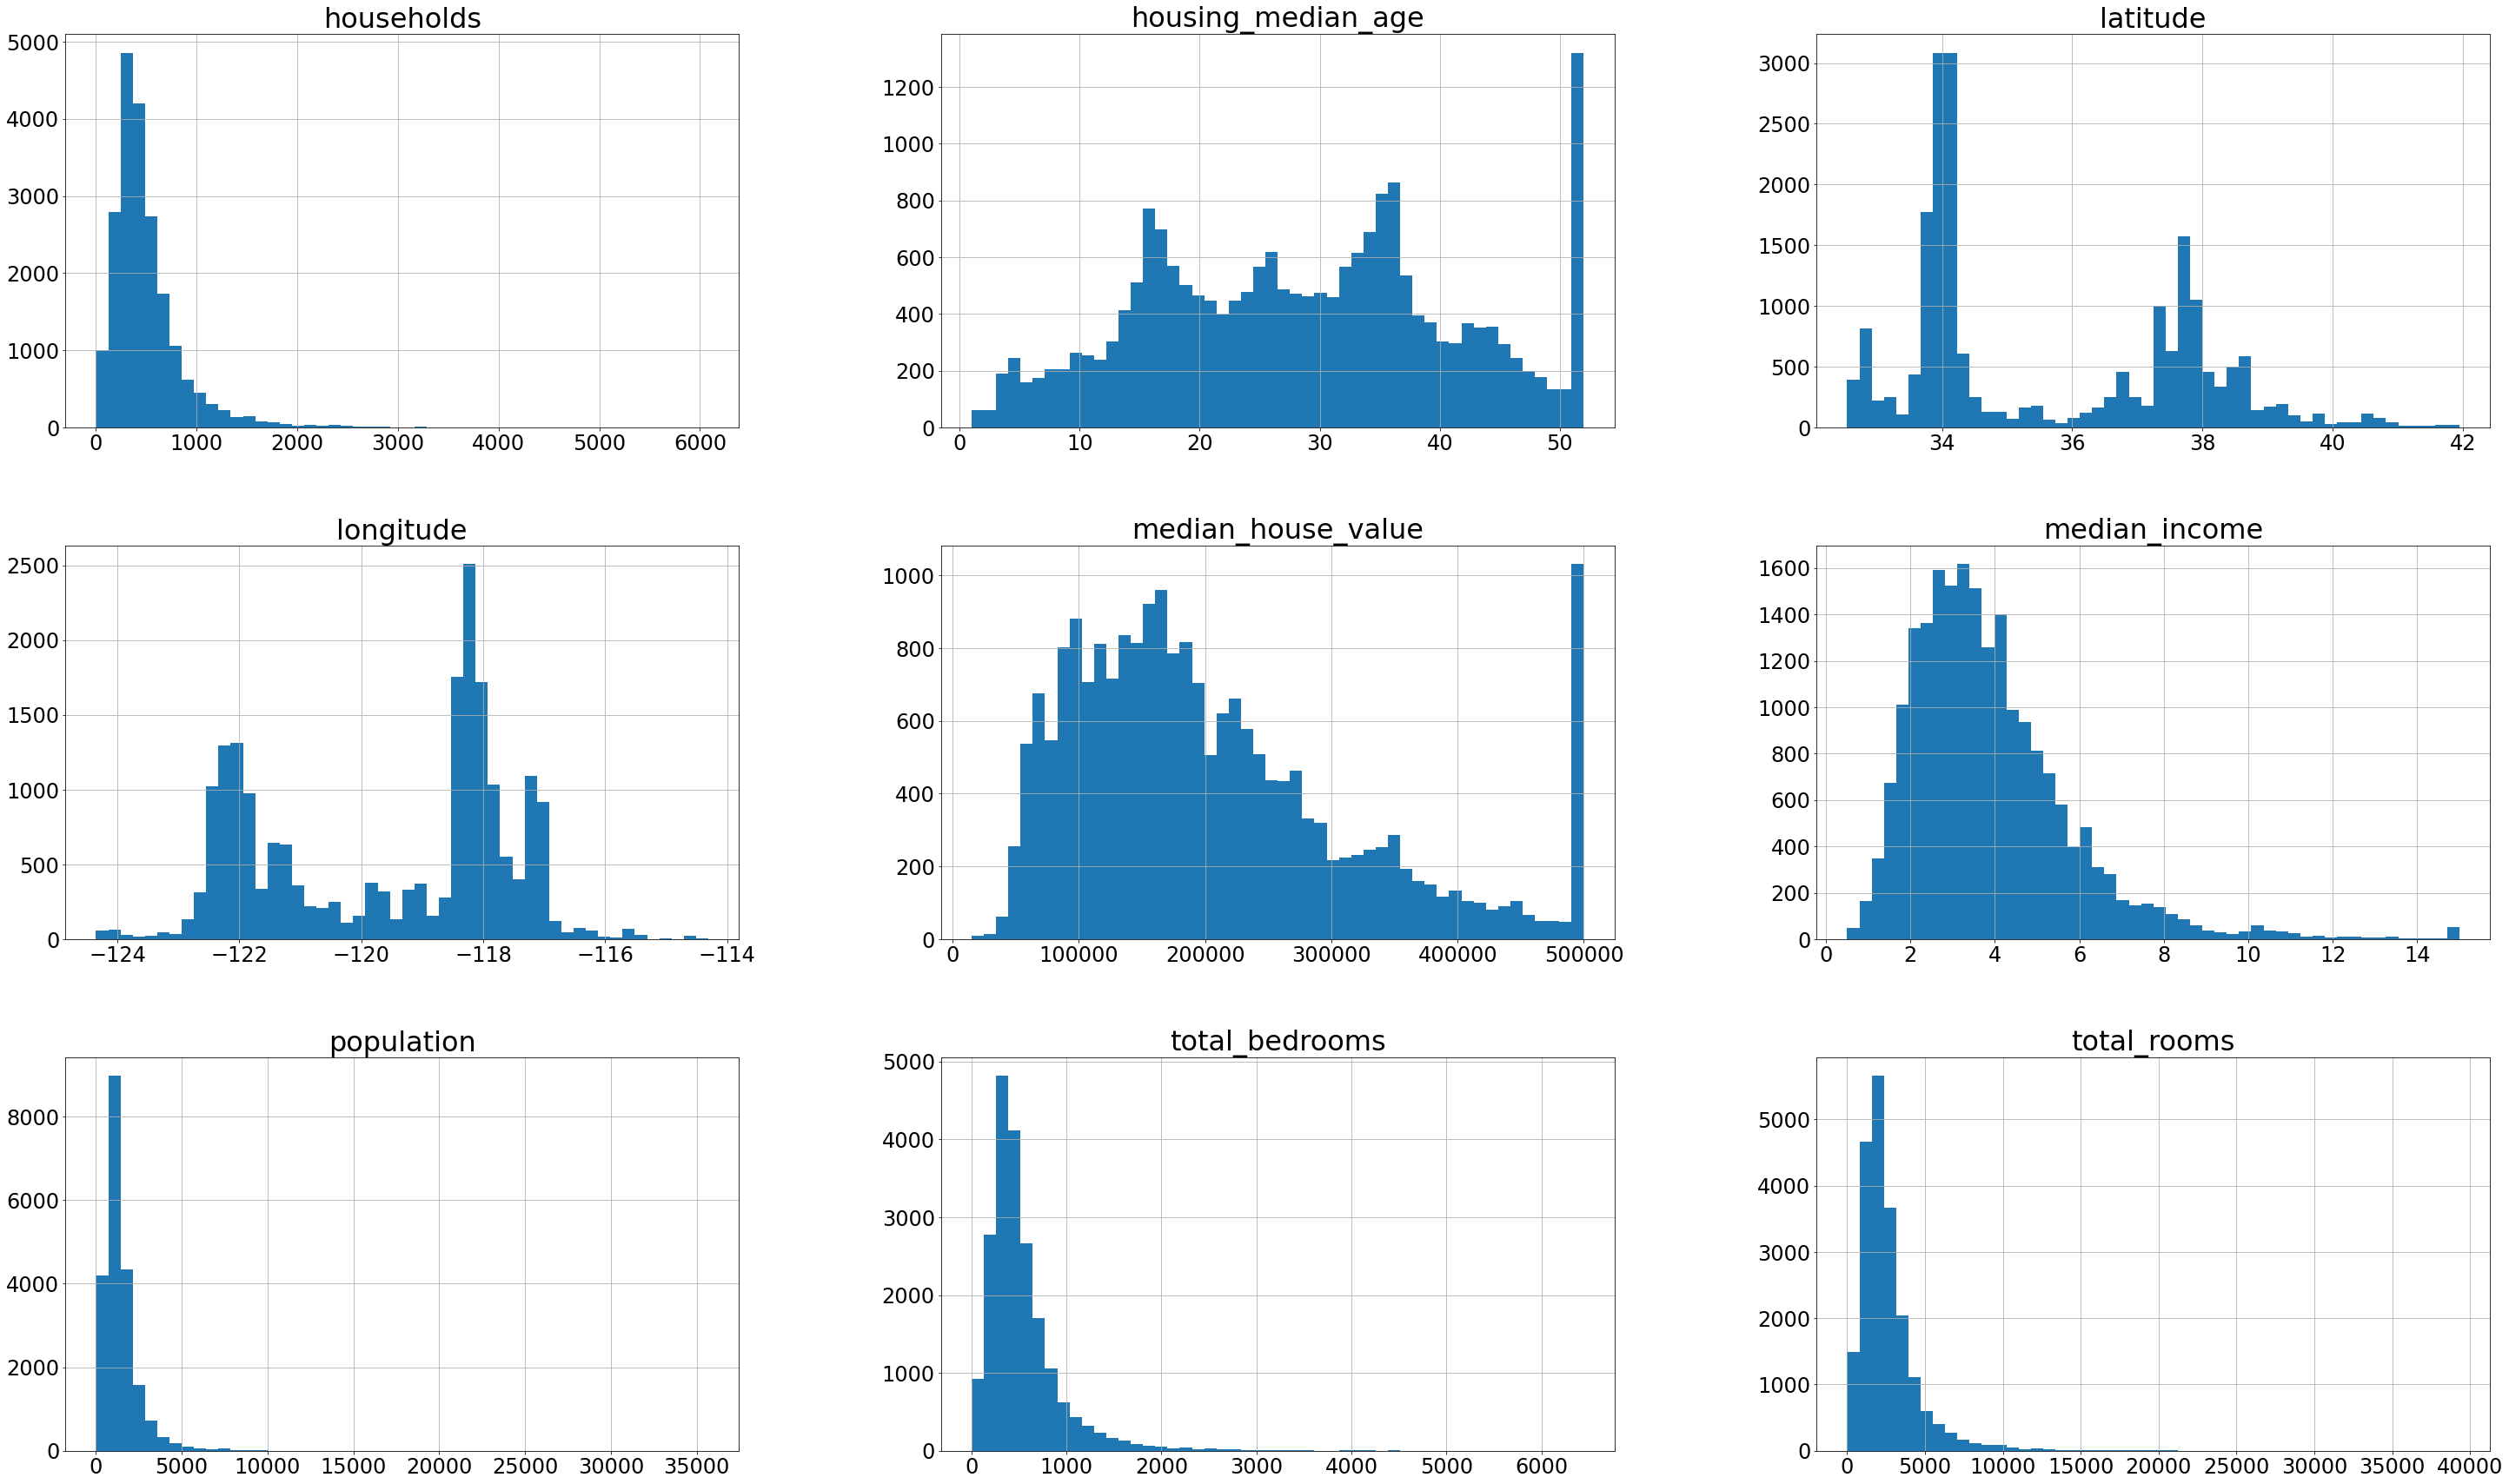

In [9]:
%matplotlib inline
import matplotlib
params = {'axes.titlesize':'32',
         'xtick.labelsize':'24',
         'ytick.labelsize': '24'}
matplotlib.rcParams.update(params)
housing.hist(bins=50, figsize=(50,30))
plt.show()

### Creating a test set

Sklearn train_test_split:
    - It has random_state parameter
    - Multiple datasets with as identical number of rows can be passed.

In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(housing, test_size=0.2,
                                        random_state=42)

### Stratified Sampling
    - When dataset is small.
    - Population is divided into homogenous subgroups called  strata
    
    Converting continuous variable into categorical variable
    Using pd.cut() function to equally divide median_income into categories, otherwise predictions may be biased.
    

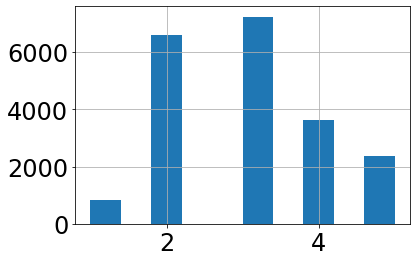

In [11]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0,1.5,3.0,4.5,6.0,np.inf],
                              labels=[1,2,3,4,5])

housing['income_cat'].hist()

### Scikit Learn Stratified_Shuffle_Split class
    - Maintains the categorical proportions in the test 
    and train datasets.
    - Almost identical to those full datasets.

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,
                              random_state=42)

for train_index, test_index in split.split(housing, 
                                           housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

### Data Exploration

In [14]:
housing = strat_train_set.copy()

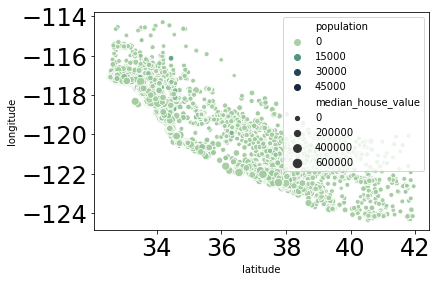

In [15]:
import seaborn as sns
sns.scatterplot(x='latitude', y ='longitude', data=housing,
               hue=housing.population, size=housing.median_house_value, palette='ch:r=-.5,l=.75')
sns.set(style='whitegrid')
plt.show()

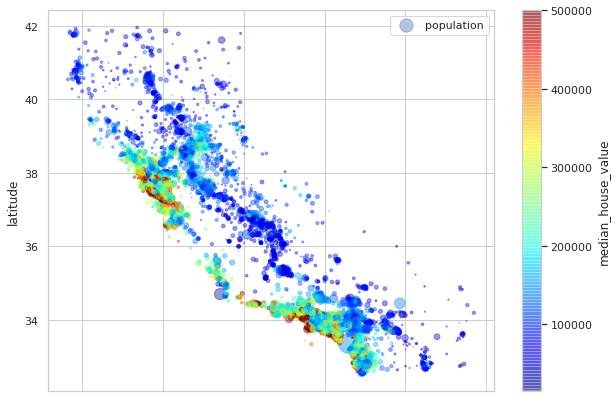

In [16]:
housing.plot(kind='scatter', x='longitude', y = 'latitude',
            alpha = 0.4, s=housing['population']/100, label='population',
            figsize=(10,7), c ='median_house_value', cmap=plt.get_cmap('jet'),
            colorbar=True)
plt.legend()

### Correlations
    - Using pandas corr() func.
    - Using pandas scatter matrix.

In [17]:
corr_matrix = housing.corr()

In [18]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [19]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

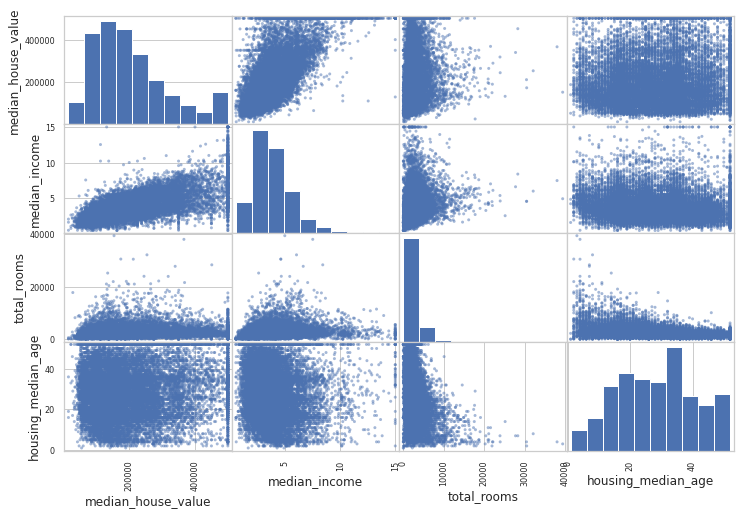

In [20]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms',
             'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


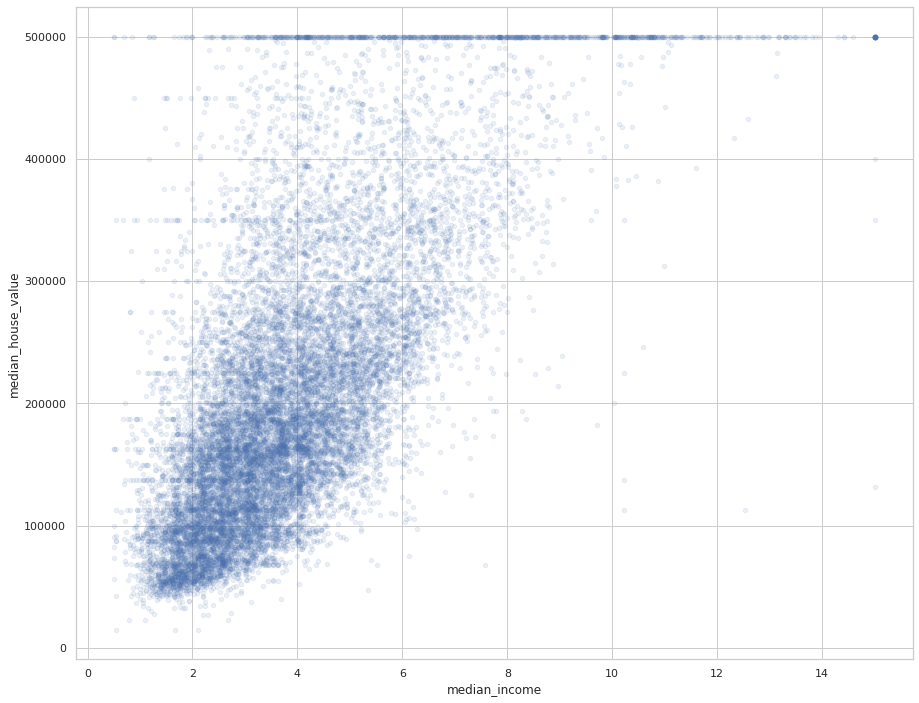

In [21]:
housing.plot(kind='scatter', x='median_income', 
             y='median_house_value', alpha=0.1, figsize=(15,12))
plt.show()

    "Above plot shows some quirks, which must be removed to prevent bad learning from algorithm."

----

----

----

-------

--------

In [22]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3


In [23]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2,4.625369,0.223852,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5,6.008850,0.159057,2.707965
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2,4.225108,0.241291,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2,5.232295,0.200866,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3,4.505810,0.231341,3.047847


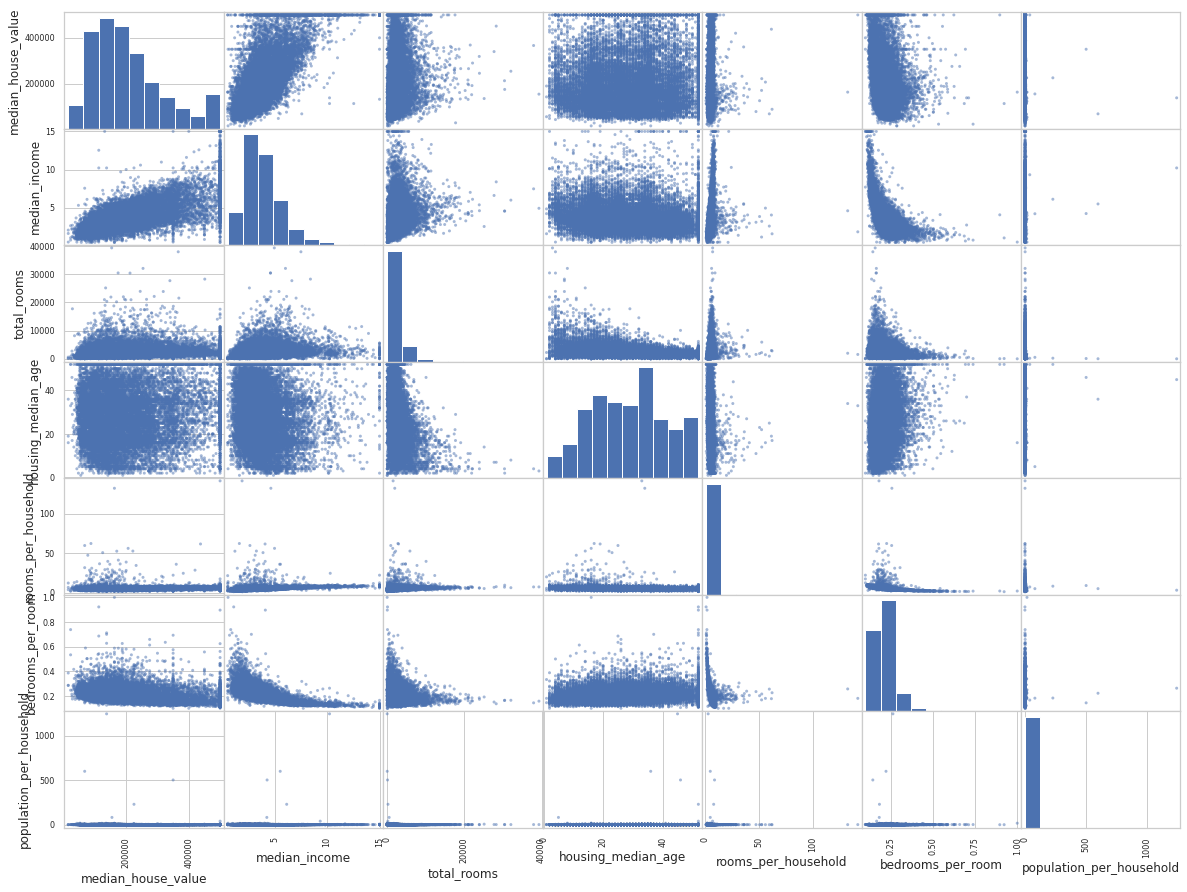

In [25]:
attributes = ['median_house_value', 'median_income', 'total_rooms',
             'housing_median_age','rooms_per_household', 'bedrooms_per_room',
                      'population_per_household']

scatter_matrix(housing[attributes], figsize=(20,15))
plt.show()

In [26]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Preparing data for Machine Learning Algorithm

In [27]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning
    - Get rid of corresponding elements.
    - Get rid of whole attribute.
    - Set the value to some value.
    - dropna(), drop(), fillna() are the methods
    - sklearn simple imputer

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [29]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [30]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index= housing_num.index)

In [31]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


### Scikit Learn API
    -Estimator: fit()
    -Transformer: transform(), fit_transform()
    -Predictor: predict(), score()
    -Inspection: imputer.strategy, imputer.statistics_
    -Nonproliferation of Classes: Numpy arrays,Scipy sparse matrices

    -Composition
    -Sensible defaults

### Handling text and Categorical Attributes
    -Sklearn.preprocessing OrdinalEncoder
    -sklearn.preprocessing OneHotEncoder
    -Embeddings: Categories with learnable, low dimensional vector

In [32]:
housing_cat = housing[['ocean_proximity']]

In [33]:
housing_cat

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [34]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [35]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [37]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [38]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers
    -Create a class and implement three methods:
        -fit()
        -transform()
        -fit_transform()

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedroom_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:,rooms_ix]/ X[:,household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedroom_per_room=X[:,bedroom_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household,population_per_household,
                        bedroom_per_room]

### Feature Scaling
    -ML algorithms perform well when numerical attributes are scaled
    -Implemented on only training data.
    -Min-Max Scaling :- sklearn MinMaxScaler
    -Standardization :- sklearn StandardScaler

### Transformation Pipeline
    -Data transformation steps that need to be in right order.

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [41]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('sttrib_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

### ColumnTransformer
    -Constructor requires list of tupules.
    -Each tuples contains:
        -Name
        -Transformer
        -List of names of columns
    -If density is less than theshold(default 0.3), it returns sparse matrix or else danse matrix

In [42]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

### Select and Train a Model
    -Regression
    -RMSE
    -DecisionTreeRegressor

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [44]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:',lin_reg.predict(some_data_prepared))
print()
print('Labels:', list(some_labels))

Predictions: [203682.37379543 326371.39370781 204218.64588245  58685.4770482
 194213.06443039]

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [45]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
print()
print('Model is underfitting')

68376.64295459937

Model is underfitting


### DecisionTreeRegressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)
print()
print('Model is overfitting')

0.0

Model is overfitting


###  Cross- Validation
    -train_test_split()
    -sklearn K-fold-validation

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [48]:
def display_scores(scores):
    print('Scores:', scores)
    print()
    print('Mean:',scores.mean())
    print()
    print('Standard deciation:', scores.std())

In [49]:
display_scores(tree_rmse_scores)

Scores: [69512.6545557  65988.99463912 72163.84789645 68717.82361875
 70541.47715143 76083.97279783 70536.6831501  71242.74195374
 77472.07429141 69960.18946802]

Mean: 71222.04595225351

Standard deciation: 3204.555483317899


In [50]:
lin_scores = cross_val_score(lin_reg, housing_prepared, 
                            housing_labels,
                             scoring='neg_mean_squared_error',
                            cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]

Mean: 68828.99948449328

Standard deciation: 2662.7615706103443


-----

### RandomForestRegressor / Ensemble Learning
    -Works by training many decision trees on random subsets of the features, then averaging out their predictions.

In [51]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
forset_predictions = forest_reg.predict(housing_prepared)
forest_scores = cross_val_score(forest_reg, housing_prepared,
                               housing_labels,
                               scoring='neg_mean_squared_error',
                               cv=10)
forest_rmse_score = np.sqrt(-forest_scores)
display_scores(forest_rmse_score)

Scores: [49698.39258529 47570.88129588 49835.90755328 51992.52199444
 49686.87079741 53344.50399515 48910.81985411 47849.08271941
 53291.12785406 50438.81396974]

Mean: 50261.89226187709

Standard deciation: 1934.5122132838076


### Fine-Tune Model
    -sklearn GridSearchCV
        -which hyperparameter
        -what values

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':
    [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [55]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 120}

In [56]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=120)

In [57]:
cvres= grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

65191.10306415975 {'max_features': 2, 'n_estimators': 3}
55386.02550305592 {'max_features': 2, 'n_estimators': 10}
53036.749300401454 {'max_features': 2, 'n_estimators': 30}
52714.11519951086 {'max_features': 2, 'n_estimators': 60}
52605.54644231039 {'max_features': 2, 'n_estimators': 90}
52382.73613345358 {'max_features': 2, 'n_estimators': 120}
61643.163374806165 {'max_features': 4, 'n_estimators': 3}
53747.957319477806 {'max_features': 4, 'n_estimators': 10}
51693.193274986144 {'max_features': 4, 'n_estimators': 30}
50970.76062590381 {'max_features': 4, 'n_estimators': 60}
50772.9928583288 {'max_features': 4, 'n_estimators': 90}
50505.782118117684 {'max_features': 4, 'n_estimators': 120}
59800.94501318476 {'max_features': 6, 'n_estimators': 3}
53824.73943214012 {'max_features': 6, 'n_estimators': 10}
50941.42344449083 {'max_features': 6, 'n_estimators': 30}
50280.42431379872 {'max_features': 6, 'n_estimators': 60}
50175.19145343661 {'max_features': 6, 'n_estimators': 90}
50118.49689

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30,60,90,120], 'max_features':[2,4,6,8,16,32,44]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':
    [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

### Randomized Search
    -When hyperparameter search space is large

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(forest_reg,param_grid, n_iter=1000)
random_search.fit(housing_prepared, housing_labels)

In [59]:
random_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=120)

### Ensemble Methods
    -Combine the models that perform best.
    

### Analyze the Best Models and Their Errors.
    -Helps in dropping less useful features
    -Helps in understand specfic errors that system makes.

In [60]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.14821307e-02, 5.51234848e-02, 4.52549695e-02, 1.56746324e-02,
       1.57051224e-02, 1.57222014e-02, 1.54320305e-02, 2.97205327e-01,
       1.41449267e-01, 3.42875546e-02, 1.12275545e-01, 4.59113511e-02,
       6.14957534e-03, 1.32165999e-01, 9.33148725e-05, 2.51415893e-03,
       3.55333486e-03])

Display important scores next to their corresponding attributes names

In [61]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold','bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2972053271618094, 'median_income'),
 (0.14144926728236892, 'income_cat'),
 (0.1321659993441932, 'INLAND'),
 (0.11227554488718439, 'pop_per_hhold'),
 (0.06148213065447101, 'longitude'),
 (0.05512348477524571, 'latitude'),
 (0.04591135110244053, 'bedrooms_per_room'),
 (0.04525496948755271, 'housing_median_age'),
 (0.03428755461971671, 'rooms_per_hhold'),
 (0.015722201384341872, 'population'),
 (0.01570512239500973, 'total_bedrooms'),
 (0.015674632388617528, 'total_rooms'),
 (0.01543203051485127, 'households'),
 (0.006149575335895561, '<1H OCEAN'),
 (0.003553334863214404, 'NEAR OCEAN'),
 (0.0025141589305959686, 'NEAR BAY'),
 (9.331487249108992e-05, 'ISLAND')]

In [62]:
list(cat_encoder.categories_[0])

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

### Evluating system on the Test Set
    -Get predictors and labels for test set.
    -Run full_pipeline
    -Call transform() not fit_transform()
    -Evaluate

In [63]:
final_model = grid_search.best_estimator_

In [64]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [65]:
final_rmse

47811.912575000584

### Computing confidence interval for generalization error

In [66]:
from scipy import stats
confidence = 0.95
squared_error = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_error) - 1,
                         loc=squared_error.mean(),
                          scale=stats.sem(squared_error)))

array([45819.23777033, 49724.79681512])